# Loan Prediction

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('Dataset.csv')

In [5]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


 ## <font color='blue'> DATA PREPROCESSING</font>

In [6]:
data.isnull().sum()



Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Before treating missinfo values, convert the categorical values

In [7]:
data.Loan_Status = data.Loan_Status.map({'Y' : 1, 'N' : 0})

In [8]:
print('Column Name\tNo. of Unique values\tUnique Values')
for i in data.columns[[1,2,3,4,5,9,10,11,12]]:
    print(i,'\t\t',len(data[str(i)].unique()),'\t\t', data[str(i)].unique())

Column Name	No. of Unique values	Unique Values
Gender 		 3 		 ['Male' 'Female' nan]
Married 		 3 		 ['No' 'Yes' nan]
Dependents 		 5 		 ['0' '1' '2' '3+' nan]
Education 		 2 		 ['Graduate' 'Not Graduate']
Self_Employed 		 3 		 ['No' 'Yes' nan]
Loan_Amount_Term 		 11 		 [360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]
Credit_History 		 3 		 [ 1.  0. nan]
Property_Area 		 3 		 ['Urban' 'Rural' 'Semiurban']
Loan_Status 		 2 		 [1 0]


In [9]:

data.Gender.replace(np.nan,'Others', inplace = True)
data.Married.replace(np.nan,'Others', inplace = True)
data.Dependents.replace(np.nan,'Others', inplace = True)
data.Self_Employed.replace(np.nan,'Others', inplace = True)
data.Loan_Amount_Term.replace(np.nan,'Others', inplace = True)
data.Credit_History.replace(np.nan,'Others', inplace = True)

In [10]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

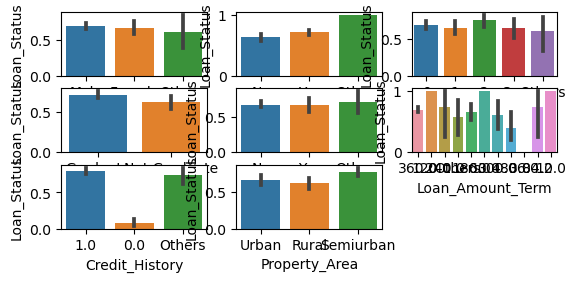

In [11]:
plotnumber = 1
for i in data.columns.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Status']):
    plt.subplot(5,3,plotnumber)
    sns.barplot(x = str(i) , y = 'Loan_Status', data = data)
    plotnumber += 1

In [12]:
data.Loan_Amount_Term.replace('Others',300, inplace = True)

In [13]:
data.Gender = data.Gender.map({'Others' : 0, 'Female' : 1,'Male':2})
data.Married = data.Married.map({'No' : 0, 'Yes' : 1,'Others':2})
data.Dependents = data.Dependents.map({'0':3,'2': 4, '3+' : 1,'Others' : 0,'1':2})
data.Education = data.Education.map({'Graduate' : 1, 'Not Graduate' : 0})
data.Self_Employed = data.Self_Employed.map({'Yes' : 0, 'No' : 1,'Others' : 2})
data.Credit_History = data.Credit_History.map({float(0) : 0, 'Others' : 1,float(1) : 2})
data.Property_Area = data.Property_Area.map({'Rural' : 0, 'Urban' : 1, 'Semiurban':2})

In [14]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,2,0,3,1,1,5849,0.0,NaN,360.0,2,1,1
1,LP001003,2,1,2,1,1,4583,1508.0,128.0,360.0,2,0,0
2,LP001005,2,1,3,1,0,3000,0.0,66.0,360.0,2,1,1
3,LP001006,2,1,3,0,1,2583,2358.0,120.0,360.0,2,1,1
4,LP001008,2,0,3,1,1,6000,0.0,141.0,360.0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,3,1,1,2900,0.0,71.0,360.0,2,0,1
610,LP002979,2,1,1,1,1,4106,0.0,40.0,180.0,2,0,1
611,LP002983,2,1,2,1,1,8072,240.0,253.0,360.0,2,1,1
612,LP002984,2,1,4,1,1,7583,0.0,187.0,360.0,2,1,1


## <font color='blue'>EDA</font>

In [16]:
categorical = [i for i in data.columns if len(data[str(i)].unique()) < 20 and i != 'Loan_Status']
numerical = [i for i in data.columns if i not in categorical and i !='Loan_Status' and data[i].dtype != 'object']

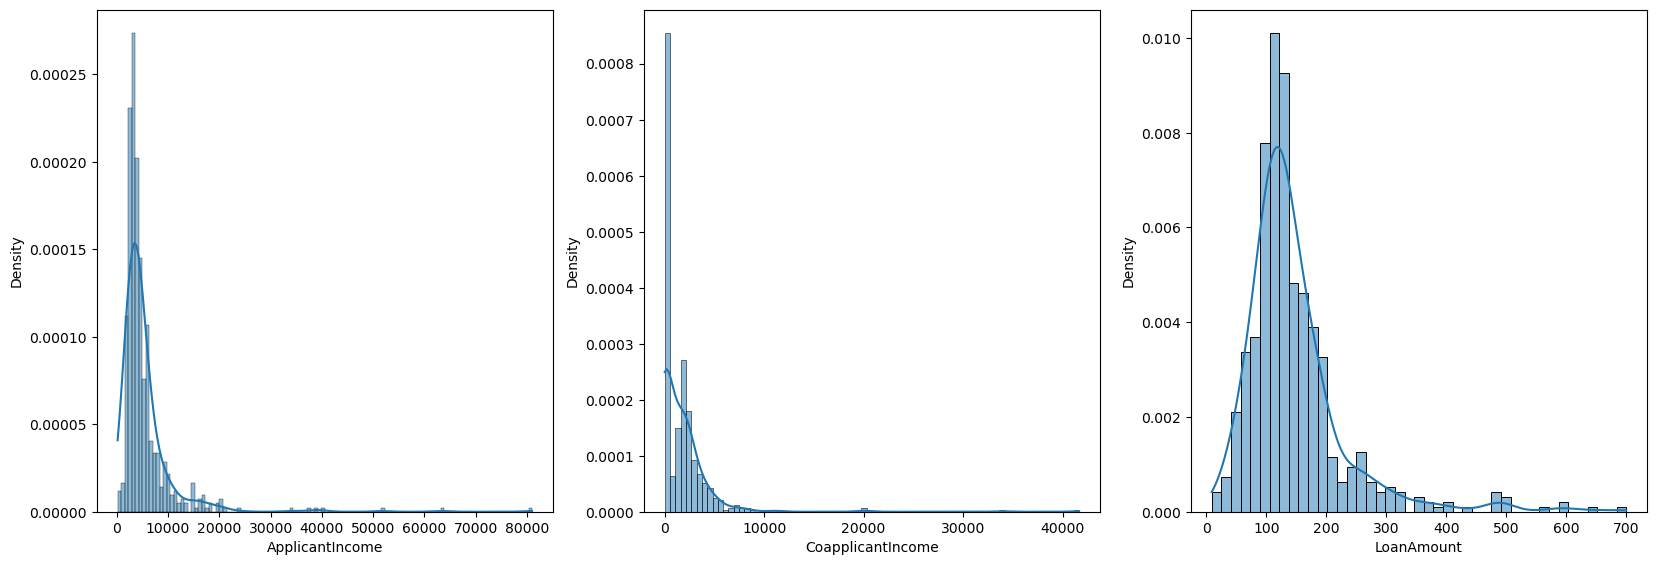

In [17]:
plt.figure(figsize=(20,30))
plotnumber = 1
for i in numerical:
    plt.subplot(4,3,plotnumber)
    sns.histplot(data[str(i)],kde=True,stat="density")
    plotnumber += 1

C:\Users\anilg\AppData\Local\Temp\ipykernel_14808\1869679677.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot= True);


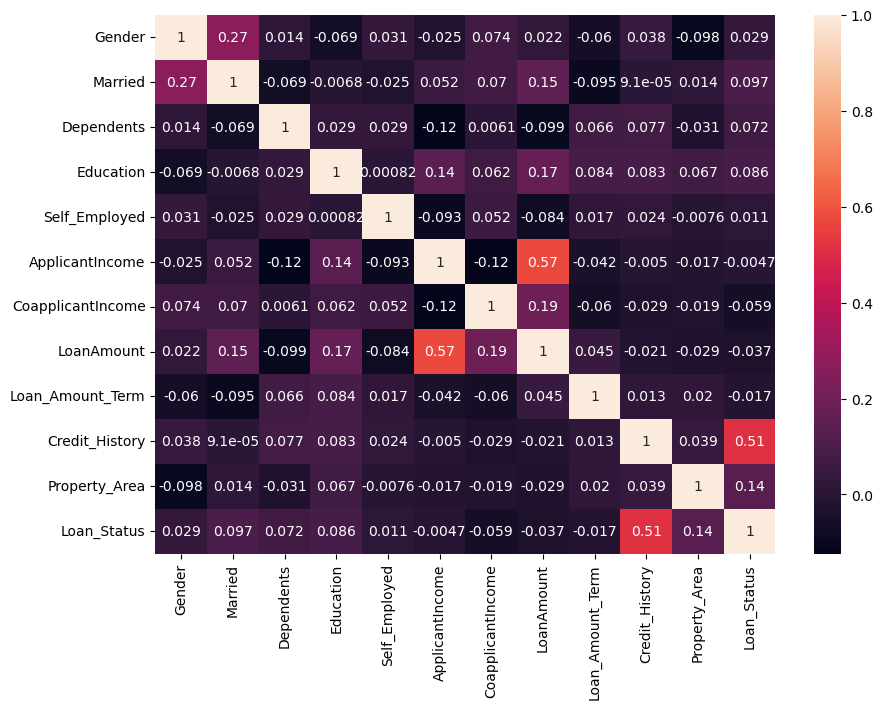

In [18]:
# The heatmap gives us the visual representation of correlation between variables.
plt.figure(figsize = (10,7))
sns.heatmap(data.corr(), annot= True);

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

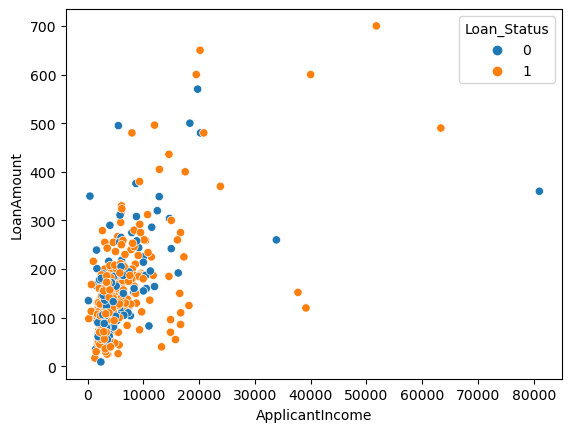

In [19]:
sns.scatterplot(x= data.ApplicantIncome , y = data.LoanAmount, hue = data.Loan_Status, data = data )

In [20]:
pd.crosstab(data.Credit_History,data.Loan_Status)

Loan_Status,0,1
Credit_History,,
0,82,7
1,13,37
2,97,378


In [21]:
m1 = data[data.LoanAmount.isnull() == False]
m1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,2,1,2,1,1,4583,1508.0,128.0,360.0,2,0,0
2,LP001005,2,1,3,1,0,3000,0.0,66.0,360.0,2,1,1
3,LP001006,2,1,3,0,1,2583,2358.0,120.0,360.0,2,1,1
4,LP001008,2,0,3,1,1,6000,0.0,141.0,360.0,2,1,1
5,LP001011,2,1,4,1,0,5417,4196.0,267.0,360.0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,3,1,1,2900,0.0,71.0,360.0,2,0,1
610,LP002979,2,1,1,1,1,4106,0.0,40.0,180.0,2,0,1
611,LP002983,2,1,2,1,1,8072,240.0,253.0,360.0,2,1,1
612,LP002984,2,1,4,1,1,7583,0.0,187.0,360.0,2,1,1


In [22]:
m2 = data[data.LoanAmount.isnull()]
m2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,2,0,3,1,1,5849,0.0,NaN,360.0,2,1,1
35,LP001106,2,1,3,1,1,2275,2067.0,NaN,360.0,2,1,1
63,LP001213,2,1,2,1,1,4945,0.0,NaN,360.0,0,0,0
81,LP001266,2,1,2,1,0,2395,0.0,NaN,360.0,2,2,1
95,LP001326,2,0,3,1,2,6782,0.0,NaN,360.0,1,1,0
102,LP001350,2,1,0,1,1,13650,0.0,NaN,360.0,2,1,1
103,LP001356,2,1,3,1,1,4652,3583.0,NaN,360.0,2,2,1
113,LP001392,1,0,2,1,0,7451,0.0,NaN,360.0,2,2,1
127,LP001449,2,0,3,1,1,3865,1640.0,NaN,360.0,2,0,1
202,LP001682,2,1,1,0,1,3992,0.0,NaN,180.0,2,1,0


In [23]:
from sklearn.linear_model  import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(m1[['Married','Education','ApplicantIncome','CoapplicantIncome']],m1[['LoanAmount']],test_size=0.2, random_state= 35)

for i in [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), XGBRegressor(), KNeighborsRegressor(), SVR()]:
    i.fit(x_train,y_train)
    print(i, ' score: ', i.score(x_test,y_test), '\n')

LinearRegression()  score:  0.21226007631549926 

DecisionTreeRegressor()  score:  0.09815576235903145 



C:\Users\anilg\AppData\Local\Temp\ipykernel_14808\878692240.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  i.fit(x_train,y_train)


RandomForestRegressor()  score:  0.5420826656089721 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)  score:  0.3144896108932572 

KNeighborsRegressor()  score:  0.5595948736015534 

SVR()  score:  0.1341446953077322 



C:\Users\anilg\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
# KNN performs well, so we use it to find missing value.

In [25]:
k1 = KNeighborsRegressor()
k1.fit(x_train,y_train)
k1.score(x_test,y_test)

0.5595948736015534

In [26]:
parameter ={'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
            'leaf_size' : np.arange(15,35,1),
            'n_neighbors' : np.arange(1,25,1),
            'p' : [1,2],
            'weights' : ['uniform', 'distance'] 
            }
from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(estimator=k1,param_distributions=parameter,cv =5, verbose =1, n_jobs=-1,n_iter=15000)
rand_search.fit(x_train,y_train)
k1 = KNeighborsRegressor(weights = rand_search.best_params_['weights'],p = rand_search.best_params_['p'] ,algorithm = rand_search.best_params_['algorithm'],leaf_size = rand_search.best_params_['leaf_size'],n_neighbors = rand_search.best_params_['n_neighbors'])
k1.fit(x_train,y_train)

C:\Users\anilg\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 5760 is smaller than n_iter=15000. Running 5760 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 5760 candidates, totalling 28800 fits


KNeighborsRegressor(algorithm='kd_tree', leaf_size=15, n_neighbors=8, p=1)

In [27]:
k1.score(x_test,y_test)

0.607878211159921

In [28]:
m2.LoanAmount = k1.predict(m2[['Married','Education','ApplicantIncome','CoapplicantIncome']])

C:\Users\anilg\AppData\Local\Temp\ipykernel_14808\3790284489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m2.LoanAmount = k1.predict(m2[['Married','Education','ApplicantIncome','CoapplicantIncome']])


In [29]:
m2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,2,0,3,1,1,5849,0.0,153.875,360.0,2,1,1
35,LP001106,2,1,3,1,1,2275,2067.0,105.625,360.0,2,1,1
63,LP001213,2,1,2,1,1,4945,0.0,111.875,360.0,0,0,0
81,LP001266,2,1,2,1,0,2395,0.0,62.500,360.0,2,2,1
95,LP001326,2,0,3,1,2,6782,0.0,134.875,360.0,1,1,0
102,LP001350,2,1,0,1,1,13650,0.0,226.625,360.0,2,1,1
103,LP001356,2,1,3,1,1,4652,3583.0,169.375,360.0,2,2,1
113,LP001392,1,0,2,1,0,7451,0.0,160.375,360.0,2,2,1
127,LP001449,2,0,3,1,1,3865,1640.0,136.250,360.0,2,0,1
202,LP001682,2,1,1,0,1,3992,0.0,99.375,180.0,2,1,0


In [30]:
m = pd.concat([m1,m2])
m = m.sort_index()

In [31]:
m.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

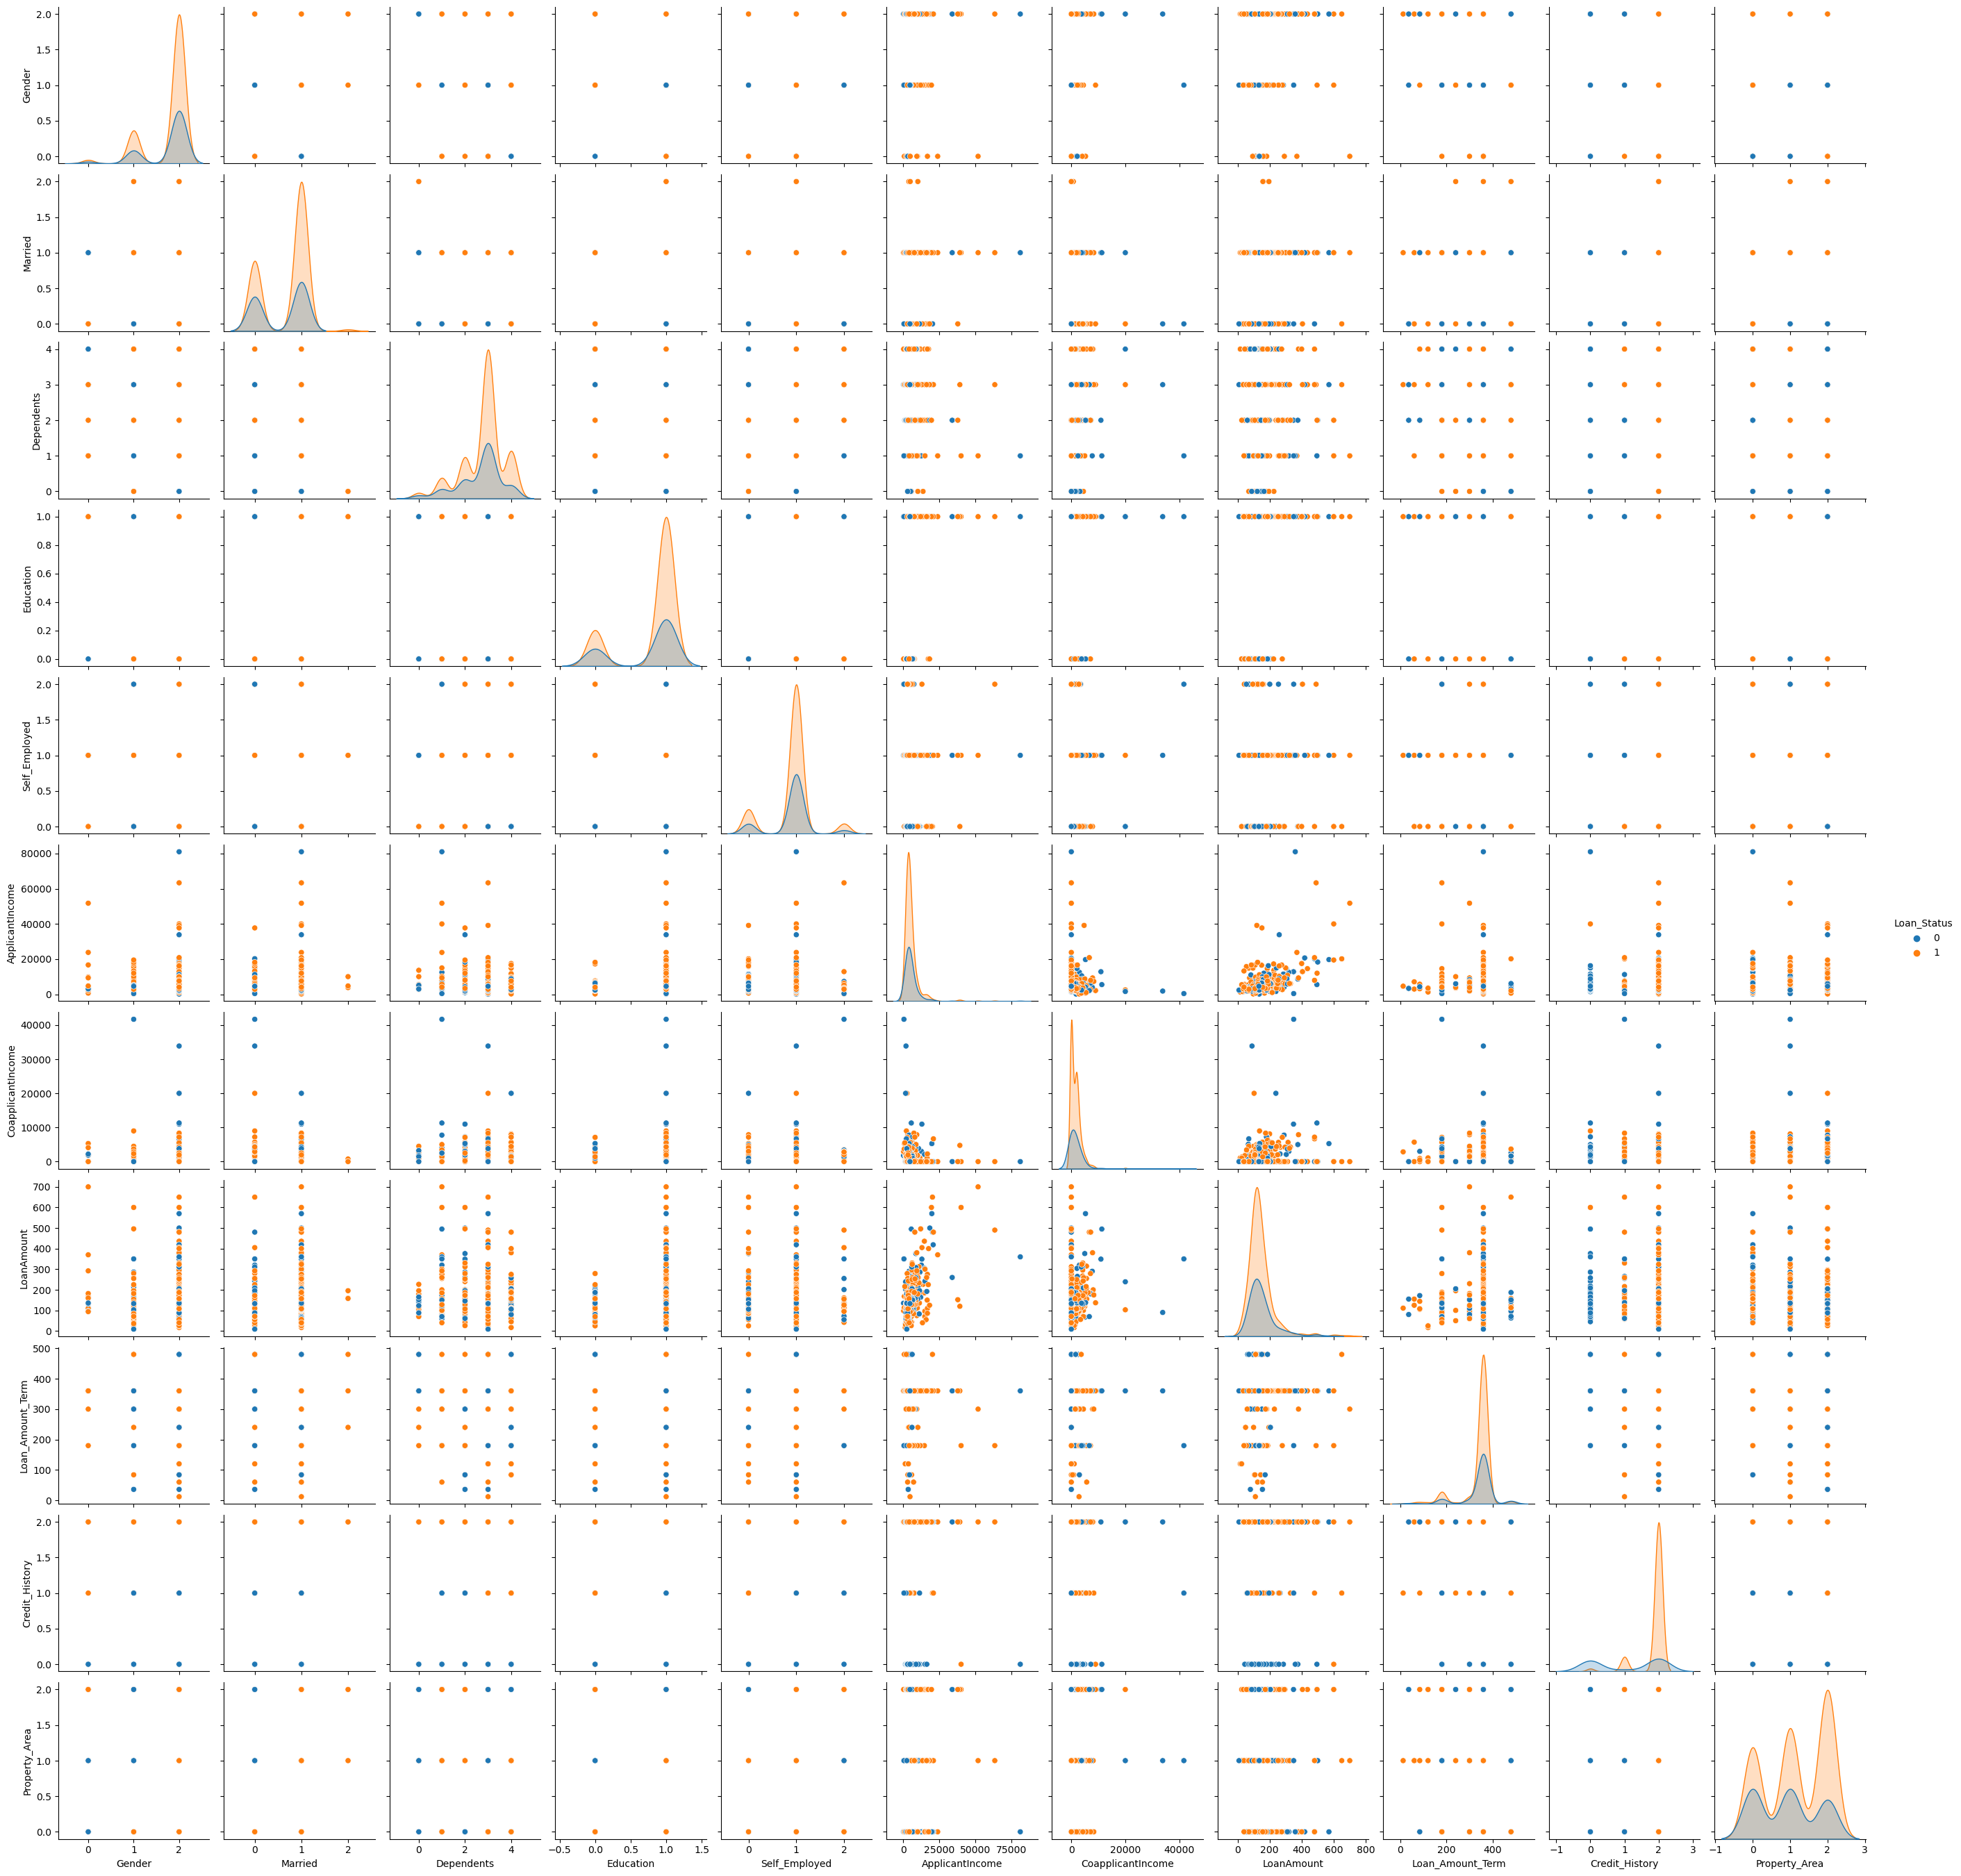

In [32]:
sns.pairplot(m, hue = 'Loan_Status')

In [33]:
X = m.drop(['Loan_Status','Loan_ID'], axis =1)
Y = m['Loan_Status']

In [34]:
categorical = [i for i in X.columns if len(X[str(i)].unique()) < 20 and i != 'Loan_Status']
numerical = [i for i in X.columns if i not in categorical and i !='Loan_Status']

In [35]:
numerical

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

C:\Users\anilg\anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


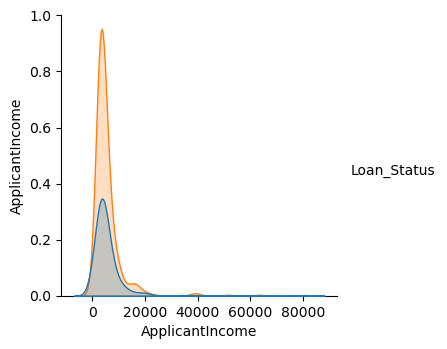

In [36]:
sns.pairplot(pd.DataFrame([m.ApplicantIncome,m.Loan_Status]).T, hue = 'Loan_Status', size=3.5)

C:\Users\anilg\anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


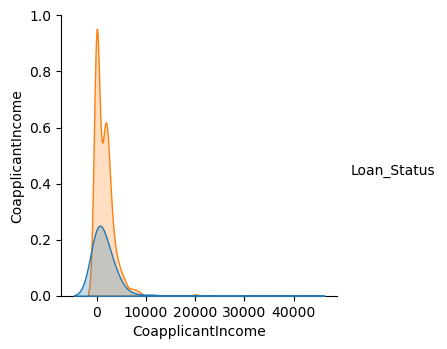

In [37]:
sns.pairplot(pd.DataFrame([m.CoapplicantIncome,m.Loan_Status]).T, hue = 'Loan_Status', size=3.5)

In [38]:
# Test to check the equality of variance
import scipy.stats as stats
for i in numerical:
    print(i,': ',stats.levene(X[i][Y == 0],X[i][Y == 1]))

ApplicantIncome :  LeveneResult(statistic=0.041357686256057014, pvalue=0.8389166546345368)
CoapplicantIncome :  LeveneResult(statistic=4.879592536865541, pvalue=0.027545734362092743)
LoanAmount :  LeveneResult(statistic=0.9853176272007302, pvalue=0.3212817799734987)


In [39]:
# Chi-Square test for Checking of Independence of variables.
from scipy import stats
print("H0 : Assume there is no dependence between two variable")
print("H1 : Assume there is dependence between two variable")
var1 = []
var2 = []
chi2 = []
df = []
p = []
d = [] 
h = []
for i in categorical:
            cross_tab = pd.crosstab(X[str(i)],Y)
            chi2_stat, p_val, dof, ex = stats.chi2_contingency(cross_tab)
            var1.append(i)
            var2.append('Loan_Status')
            chi2.append(chi2_stat)
            df.append(dof)
            p.append(p_val)
            if p_val > 0.05:
                d.append('Independent')
                h.append('Accepted')
            else:
                d.append('Dependent')
                h.append('Rejected')
a = pd.DataFrame([var1,var2,chi2,df,p,d,h],index=['variable 1','variable 2','Chi2 Value','DOF','P Value','Decison (5% LOS)','Null Hypothesis']).T
a

H0 : Assume there is no dependence between two variable
H1 : Assume there is dependence between two variable


,variable 1,variable 2,Chi2 Value,DOF,P Value,Decison (5% LOS),Null Hypothesis
0,Gender,Loan_Status,0.555896,2,0.757336,Independent,Accepted
1,Married,Loan_Status,6.254866,2,0.04383,Dependent,Rejected
2,Dependents,Loan_Status,3.691427,4,0.449374,Independent,Accepted
3,Education,Loan_Status,4.09149,1,0.0431,Dependent,Rejected
4,Self_Employed,Loan_Status,0.158498,2,0.92381,Independent,Accepted
5,Loan_Amount_Term,Loan_Status,14.780999,9,0.09713,Independent,Accepted
6,Credit_History,Loan_Status,180.066469,2,0.0,Dependent,Rejected
7,Property_Area,Loan_Status,12.297623,2,0.002136,Dependent,Rejected


In [40]:
X = m[['Married','Education','Property_Area','CoapplicantIncome','Credit_History']]
Y = m['Loan_Status']

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size= 0.25, random_state = 35)

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [44]:
X_scaled = scalar.fit_transform(X)

In the Banking industry giving loans is the primary source of making money but at the same time if your repayment rate is not good you will not make any profit, rather you will risk huge losses. 
Banks don’t want to lose good customers and at the same point in time, they don’t want to acquire bad 
customers. In this scenario, both the false positives and false negatives become very important to measure. This Problem is related to Prediction of Loan Approval, So our main objective is to build a model that can correctly predict whether a customer gets loan or not. We should give more priority to `maximize Recall or Sensitivity` and at the same time we should maximize `Precision` or we can say we should minimize the False Positive Rate.

#### Recall or Sensitivity
The mathematical formula is:

   __Recall__= $ \frac{ TP}{(TP+FN)} $

Or, as the name suggests, it is a measure of: from the total number of positive results how many positives were correctly predicted by the model.

In [53]:
# Creating a Function for metrics of model
from sklearn.metrics import confusion_matrix, roc_auc_score
def score(model, x_test, y_test):
    y_pred = model.predict(x_test)
    
    conf_mat = confusion_matrix(y_test,y_pred)
    true_positive = conf_mat[1][1]
    false_positive = conf_mat[0][1]
    false_negative = conf_mat[1][0]
    true_negative = conf_mat[0][0]
    
    Accuracy = (true_positive+true_negative)/(true_positive+true_negative+false_negative+false_positive)
    Precision = true_positive/(true_positive+false_positive)
    Recall = true_positive/(true_positive+false_negative)
    F1_Score = 2*(Recall * Precision) / (Recall + Precision)
    auc = roc_auc_score(y_test, y_pred)
    
    print('Model Name\t',model)
    print('Accuracy\t {:.4f}'.format(Accuracy))
    print('Precision\t {:.4f}'.format(Precision))
    print('Recall\t\t {:.4f}'.format(Recall))
    print('F1 Score\t {:.4f}'.format(F1_Score))
    print('AUC\t\t {:.4f}'.format(auc))

In [54]:
# Creating a function for Cross Validation
from numpy import mean
from numpy import std
from sklearn.metrics import recall_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, random_state=1, shuffle=True)

def kcross(model,X,Y):
    scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
    scores = cross_val_score(model, X, Y, scoring='precision', cv=cv, n_jobs=-1)
    print('Precision: %.3f (%.3f)' % (mean(scores), std(scores)))
    scores = cross_val_score(model, X, Y, scoring='recall', cv=cv, n_jobs=-1)
    print('Recall: %.3f (%.3f)' % (mean(scores), std(scores)))
    scores = cross_val_score(model, X, Y, scoring='f1', cv=cv, n_jobs=-1)
    print('F1 Score: %.3f (%.3f)' % (mean(scores), std(scores)))
    scores = cross_val_score(model, X, Y, scoring='roc_auc', cv=cv, n_jobs=-1)
    print('AUC: %.3f (%.3f)' % (mean(scores), std(scores)))

# Logistic Regression

In [55]:
from sklearn.linear_model  import LogisticRegression
# create model
model = LogisticRegression()
model.fit(x_train,y_train)
score(model,x_test,y_test)

Model Name	 LogisticRegression()
Accuracy	 0.7857
Precision	 0.7879
Recall		 0.9541
F1 Score	 0.8631
AUC		 0.6660


In [56]:
kcross(model,X_scaled,Y)

Accuracy: 0.788 (0.060)
Precision: 0.796 (0.060)
Recall: 0.933 (0.035)
F1 Score: 0.858 (0.041)
AUC: 0.772 (0.082)


In [57]:
from scipy.stats import uniform
parameter = {'C' : uniform(loc = 0,scale =4), 'penalty' : ['l1','l2','elasticnet']}

from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(estimator=model,param_distributions=parameter,scoring='roc_auc',cv =5, verbose =1, n_jobs=-1,n_iter=1000)
rand_search.fit(x_train,y_train)
model = LogisticRegression(C = rand_search.best_params_['C'],penalty = rand_search.best_params_['penalty'],solver = 'liblinear' )
model.fit(x_train,y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


C:\Users\anilg\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3450 fits failed out of a total of 5000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1715 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\anilg\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\anilg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\anilg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(

LogisticRegression(C=0.012758943547062529, solver='liblinear')

In [58]:
score(model,x_test,y_test)

Model Name	 LogisticRegression(C=0.012758943547062529, solver='liblinear')
Accuracy	 0.7857
Precision	 0.7879
Recall		 0.9541
F1 Score	 0.8631
AUC		 0.6660


In [59]:
kcross(model,X_scaled,Y)

Accuracy: 0.788 (0.063)
Precision: 0.795 (0.061)
Recall: 0.936 (0.037)
F1 Score: 0.859 (0.043)
AUC: 0.773 (0.082)


# Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier
# create model
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
score(model,x_test,y_test)

Model Name	 DecisionTreeClassifier()
Accuracy	 0.7013
Precision	 0.7692
Recall		 0.8257
F1 Score	 0.7965
AUC		 0.6128


In [61]:
model.feature_importances_

array([0.0458218 , 0.04276874, 0.05131489, 0.38791145, 0.47218312])

In [62]:
parameter = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random'],
    
}
from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(estimator=model,param_distributions=parameter,scoring='roc_auc',cv =5, verbose =1, n_jobs=-1,n_iter=10000)
rand_search.fit(x_train,y_train)
model = DecisionTreeClassifier(criterion = rand_search.best_params_['criterion'],max_depth = rand_search.best_params_['max_depth'],min_samples_leaf = rand_search.best_params_['min_samples_leaf'],min_samples_split = rand_search.best_params_['min_samples_split'],splitter = rand_search.best_params_['splitter'])
model.fit(x_train,y_train)

C:\Users\anilg\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 8640 is smaller than n_iter=10000. Running 8640 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


DecisionTreeClassifier(max_depth=3, min_samples_leaf=6, min_samples_split=8,
                       splitter='random')

In [63]:
score(model,x_test,y_test)

Model Name	 DecisionTreeClassifier(max_depth=3, min_samples_leaf=6, min_samples_split=8,
                       splitter='random')
Accuracy	 0.7987
Precision	 0.7786
Recall		 1.0000
F1 Score	 0.8755
AUC		 0.6556


In [64]:
kcross(model,X_scaled,Y)

Accuracy: 0.808 (0.046)
Precision: 0.792 (0.050)
Recall: 0.984 (0.011)
F1 Score: 0.877 (0.031)
AUC: 0.746 (0.062)


# Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier
# create model
model = RandomForestClassifier()
model.fit(x_train,y_train)
score(model,x_test,y_test)

Model Name	 RandomForestClassifier()
Accuracy	 0.7792
Precision	 0.7953
Recall		 0.9266
F1 Score	 0.8559
AUC		 0.6744


In [66]:
kcross(model,X_scaled,Y)

Accuracy: 0.759 (0.051)
Precision: 0.793 (0.047)
Recall: 0.887 (0.061)
F1 Score: 0.835 (0.036)
AUC: 0.745 (0.058)


In [68]:
parameter = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    
}
from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(estimator=model,param_distributions=parameter,scoring='roc_auc',cv =5, verbose =1, n_jobs=-1,n_iter=500)
rand_search.fit(x_train,y_train)
model = RandomForestClassifier(n_estimators = rand_search.best_params_['n_estimators'],criterion = rand_search.best_params_['criterion'],min_samples_leaf = rand_search.best_params_['min_samples_leaf'],min_samples_split = rand_search.best_params_['min_samples_split'],max_depth = rand_search.best_params_['max_depth'])
model.fit(x_train,y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


RandomForestClassifier(criterion='entropy', max_depth=2, min_samples_split=6,
                       n_estimators=130)

In [69]:
score(model,x_test,y_test)

Model Name	 RandomForestClassifier(criterion='entropy', max_depth=2, min_samples_split=6,
                       n_estimators=130)
Accuracy	 0.7987
Precision	 0.7786
Recall		 1.0000
F1 Score	 0.8755
AUC		 0.6556


In [70]:
kcross(model,X_scaled,Y)

Accuracy: 0.810 (0.048)
Precision: 0.792 (0.050)
Recall: 0.984 (0.011)
F1 Score: 0.877 (0.031)
AUC: 0.764 (0.067)


# XG Boost

In [71]:
from xgboost import XGBClassifier
# create model
model = XGBClassifier()
model.fit(x_train,y_train)
score(model,x_test,y_test)

Model Name	 XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Accuracy	 0.7532
Precision	 0.7795
Recall		 0.9083
F1 Score	 0.8390
AUC		 0.6430


In [72]:
kcross(model,X_scaled,Y)

Accuracy: 0.759 (0.059)
Precision: 0.791 (0.058)
Recall: 0.886 (0.048)
F1 Score: 0.834 (0.042)
AUC: 0.736 (0.075)


In [73]:
parameter={
            'learning_rate':np.arange(0,1,0.05),
            'max_depth': [1,3,5,6,7,8,9,10,12,15],
            'n_estimators':[10,50,100,200],
            'subsample' : np.arange(0.5,1.1,0.1)
            }
from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(estimator=model,param_distributions=parameter,scoring='roc_auc',cv =5, verbose =1, n_jobs=7,n_iter=500)
rand_search.fit(x_train,y_train)
model = XGBClassifier(objective = 'binary:logistic', learning_rate = rand_search.best_params_['learning_rate'],max_depth = rand_search.best_params_['max_depth'],n_estimators = rand_search.best_params_['n_estimators'],subsample = rand_search.best_params_['subsample'])
model.fit(x_train,y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


C:\Users\anilg\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
315 fits failed out of a total of 2500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
315 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\anilg\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\anilg\anaconda3\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "C:\Users\anilg\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1490, in fit
    self._Booster = train(
  File "C:\Users\anilg\anaconda3\lib\site-packages\xgboost\core.py", line

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [74]:
score(model,x_test,y_test)

Model Name	 XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Accuracy	 0.7987
Precision	 0.7786
Recall		 1.0000
F1 Score	 0.8755
AUC		 0.6556


In [75]:
rand_search.best_params_

{'subsample': 0.6, 'n_estimators': 10, 'max_depth': 1, 'learning_rate': 0.5}

In [76]:
kcross(model,X_scaled,Y)

Accuracy: 0.806 (0.051)
Precision: 0.791 (0.051)
Recall: 0.979 (0.021)
F1 Score: 0.874 (0.034)
AUC: 0.737 (0.071)


# KNN

In [77]:
from sklearn.neighbors import KNeighborsClassifier
# create model
model = KNeighborsClassifier()
model.fit(x_train,y_train)
score(model,x_test,y_test)

Model Name	 KNeighborsClassifier()
Accuracy	 0.7987
Precision	 0.8047
Recall		 0.9450
F1 Score	 0.8692
AUC		 0.6947


In [78]:
kcross(model,X_scaled,Y)

Accuracy: 0.782 (0.055)
Precision: 0.794 (0.060)
Recall: 0.927 (0.051)
F1 Score: 0.853 (0.039)
AUC: 0.730 (0.072)


In [79]:
parameter ={'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
            'leaf_size' : np.arange(15,35,1),
            'n_neighbors' : np.arange(1,25,1),
            'p' : [1,2],
            'weights' : ['uniform', 'distance'] 
            }
from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(estimator=model,param_distributions=parameter,scoring='roc_auc',cv =5, verbose =1, n_jobs=-1,n_iter=15000)
rand_search.fit(x_train,y_train)
model = KNeighborsClassifier(weights = rand_search.best_params_['weights'],p = rand_search.best_params_['p'] ,algorithm = rand_search.best_params_['algorithm'],leaf_size = rand_search.best_params_['leaf_size'],n_neighbors = rand_search.best_params_['n_neighbors'])
model.fit(x_train,y_train)

Fitting 5 folds for each of 5760 candidates, totalling 28800 fits


C:\Users\anilg\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 5760 is smaller than n_iter=15000. Running 5760 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


KNeighborsClassifier(algorithm='ball_tree', leaf_size=23, n_neighbors=21, p=1)

In [80]:
score(model,x_test,y_test)

Model Name	 KNeighborsClassifier(algorithm='ball_tree', leaf_size=23, n_neighbors=21, p=1)
Accuracy	 0.7987
Precision	 0.7786
Recall		 1.0000
F1 Score	 0.8755
AUC		 0.6556


In [81]:
kcross(model,X_scaled,Y)

Accuracy: 0.808 (0.047)
Precision: 0.793 (0.049)
Recall: 0.979 (0.012)
F1 Score: 0.875 (0.030)
AUC: 0.734 (0.068)


In [82]:
kcross(model,X_scaled,Y)

Accuracy: 0.808 (0.047)
Precision: 0.793 (0.049)
Recall: 0.979 (0.012)
F1 Score: 0.875 (0.030)
AUC: 0.734 (0.068)


# Naive Bayes

In [83]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)
score(model,x_test,y_test)

Model Name	 GaussianNB()
Accuracy	 0.7532
Precision	 0.7840
Recall		 0.8991
F1 Score	 0.8376
AUC		 0.6495


In [84]:
kcross(model,X_scaled,Y)

Accuracy: 0.772 (0.060)
Precision: 0.800 (0.061)
Recall: 0.896 (0.040)
F1 Score: 0.844 (0.042)
AUC: 0.778 (0.081)


# Support Vector Classifier (SVC)

In [85]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)
score(model,x_test,y_test)

Model Name	 SVC()
Accuracy	 0.8052
Precision	 0.7883
Recall		 0.9908
F1 Score	 0.8780
AUC		 0.6732


In [86]:
kcross(model,X_scaled,Y)

Accuracy: 0.811 (0.050)
Precision: 0.795 (0.052)
Recall: 0.981 (0.014)
F1 Score: 0.877 (0.033)
AUC: 0.729 (0.091)


# Stacking

In [87]:
from sklearn.linear_model  import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [88]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(X)

In [89]:
#XG Boost
xg = XGBClassifier(subsample= 0.7999999999999999,n_estimators = 100, max_depth = 7, learning_rate = 0.05)

In [90]:
#random Forest
rf = RandomForestClassifier(max_depth=9, min_samples_split=5, n_estimators=90)

In [91]:
# Decision Tree
dt = DecisionTreeClassifier(criterion='entropy', max_depth=27, min_samples_leaf=3,min_samples_split=8, splitter='random')

In [92]:
# Logistic Regression
lg = LogisticRegression()

In [93]:
# KNN
knn = KNeighborsClassifier(algorithm='brute', leaf_size=15, n_neighbors=12, p=1)

In [94]:
# SVC
svc = SVC(probability= True)

In [95]:
from sklearn.model_selection import train_test_split
train,val_train,test,val_test = train_test_split(scaled_data,Y,test_size=0.5, random_state= 355)
x_train,x_test,y_train,y_test =  train_test_split(train,test,test_size=0.2, random_state= 355)

In [96]:
for i in [lg, dt, rf, xg, knn, svc]:
    i.fit(x_train,y_train)
    print(i, ' score: ', i.score(x_test,y_test), '\n')

LogisticRegression()  score:  0.8709677419354839 

DecisionTreeClassifier(criterion='entropy', max_depth=27, min_samples_leaf=3,
                       min_samples_split=8, splitter='random')  score:  0.8870967741935484 

RandomForestClassifier(max_depth=9, min_samples_split=5, n_estimators=90)  score:  0.8225806451612904 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num

In [97]:
predict_val1 = xg.predict_proba(val_train)
predict_val2 = knn.predict_proba(val_train)
predict_val3 = rf.predict_proba(val_train)
predict_val4 = svc.predict_proba(val_train)
predict_val5 = lg.predict_proba(val_train)
predict_val6 = dt.predict_proba(val_train)
predict_val = np.column_stack((predict_val1,predict_val2,predict_val3,predict_val4,predict_val5,predict_val6))
predict_val

array([[0.46230811, 0.53769189, 0.41666667, ..., 0.65025205, 0.44444444,
        0.55555556],
       [0.93849987, 0.06150015, 0.91666667, ..., 0.0647341 , 1.        ,
        0.        ],
       [0.41263747, 0.58736253, 0.33333333, ..., 0.77154638, 0.42857143,
        0.57142857],
       ...,
       [0.22393858, 0.77606142, 0.16666667, ..., 0.83061643, 0.21428571,
        0.78571429],
       [0.05684185, 0.94315815, 0.08333333, ..., 0.87275069, 0.1875    ,
        0.8125    ],
       [0.0714615 , 0.9285385 , 0.08333333, ..., 0.82522446, 0.21428571,
        0.78571429]])

In [98]:
rand_clf = RandomForestClassifier()
rand_clf.fit(predict_val,val_test)

RandomForestClassifier()

In [99]:
predict_test1 = xg.predict_proba(x_test)
predict_test2 = knn.predict_proba(x_test)
predict_test3 = rf.predict_proba(x_test)
predict_test4 = svc.predict_proba(x_test)
predict_test5 = lg.predict_proba(x_test)
predict_test6 = dt.predict_proba(x_test)
predict_test = np.column_stack((predict_test1,predict_test2,predict_test3,predict_test4,predict_test5,predict_test6))
predict_test

array([[0.12335587, 0.87664413, 0.25      , 0.75      , 0.38973618,
        0.61026382, 0.22636478, 0.77363522, 0.18896801, 0.81103199,
        0.21428571, 0.78571429],
       [0.26873976, 0.73126024, 0.25      , 0.75      , 0.18591332,
        0.81408668, 0.2267087 , 0.7732913 , 0.18004143, 0.81995857,
        0.21428571, 0.78571429],
       [0.29953212, 0.70046788, 0.16666667, 0.83333333, 0.27950586,
        0.72049414, 0.2285735 , 0.7714265 , 0.27030296, 0.72969704,
        0.33333333, 0.66666667],
       [0.22393858, 0.77606142, 0.16666667, 0.83333333, 0.16680048,
        0.83319952, 0.22858174, 0.77141826, 0.16938357, 0.83061643,
        0.21428571, 0.78571429],
       [0.93408614, 0.06591383, 0.91666667, 0.08333333, 0.9984127 ,
        0.0015873 , 0.91015993, 0.08984007, 0.79124486, 0.20875514,
        1.        , 0.        ],
       [0.28842664, 0.71157336, 0.41666667, 0.58333333, 0.53982363,
        0.46017637, 0.27678362, 0.72321638, 0.39115395, 0.60884605,
        0.44444444,

In [100]:
score(rand_clf,predict_test,y_test)

Model Name	 RandomForestClassifier()
Accuracy	 0.8226
Precision	 0.8980
Recall		 0.8800
F1 Score	 0.8889
AUC		 0.7317


In [101]:
kcross(rand_clf,predict_val,val_test)

Accuracy: 0.759 (0.065)
Precision: 0.794 (0.081)
Recall: 0.908 (0.058)
F1 Score: 0.838 (0.048)
AUC: 0.701 (0.083)


In [102]:
parameter = {
    "n_estimators" : np.arange(50,150,10),
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
}
from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(estimator=RandomForestClassifier(),scoring='roc_auc',param_distributions=parameter,cv =5, verbose =1, n_jobs=-1,n_iter=2000)
rand_search.fit(predict_val,val_test)
model = RandomForestClassifier(n_estimators = rand_search.best_params_['n_estimators'],criterion = rand_search.best_params_['criterion'],min_samples_leaf = rand_search.best_params_['min_samples_leaf'],min_samples_split = rand_search.best_params_['min_samples_split'],max_depth = rand_search.best_params_['max_depth'])
model.fit(predict_val,val_test)

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


RandomForestClassifier(max_depth=3, min_samples_leaf=3, min_samples_split=6,
                       n_estimators=90)

In [103]:
score(model,predict_test,y_test)

Model Name	 RandomForestClassifier(max_depth=3, min_samples_leaf=3, min_samples_split=6,
                       n_estimators=90)
Accuracy	 0.9032
Precision	 0.9231
Recall		 0.9600
F1 Score	 0.9412
AUC		 0.8133


In [104]:
kcross(model,predict_val,val_test)

Accuracy: 0.792 (0.077)
Precision: 0.788 (0.082)
Recall: 0.967 (0.039)
F1 Score: 0.868 (0.054)
AUC: 0.776 (0.046)


# Customised Stacking

In [105]:
from sklearn.linear_model  import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [106]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(X)

In [107]:
#XG Boost
xg = XGBClassifier()
#random Forest
rf = RandomForestClassifier()
# Decision Tree
dt = DecisionTreeClassifier()
# Logistic Regression
lg = LogisticRegression()
# KNN
knn = KNeighborsClassifier()
# SVC
svc = SVC()

In [108]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 35 )

In [109]:
for j in x_train:
    for i in [lg, dt, rf, xg, knn, svc]:
        print(j)
        i.fit(pd.DataFrame(x_train[str(j)]),y_train)
        score(i,pd.DataFrame(x_test[str(j)]),y_test)
        print('\n')

Married
Model Name	 LogisticRegression()
Accuracy	 0.7317
Precision	 0.7317
Recall		 1.0000
F1 Score	 0.8451
AUC		 0.5000


Married
Model Name	 DecisionTreeClassifier()
Accuracy	 0.7317
Precision	 0.7317
Recall		 1.0000
F1 Score	 0.8451
AUC		 0.5000


Married
Model Name	 RandomForestClassifier()
Accuracy	 0.7317
Precision	 0.7317
Recall		 1.0000
F1 Score	 0.8451
AUC		 0.5000


Married
Model Name	 XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan

In [110]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(X)

In [111]:
from sklearn.model_selection import train_test_split
train,val_train,test,val_test = train_test_split(scaled_data,Y,test_size=0.5, random_state= 355)
x_train,x_test,y_train,y_test =  train_test_split(train,test,test_size=0.2, random_state= 355)

In [112]:
m1 = lg.fit(pd.DataFrame(x_train[:,[3]]),y_train)
knn.fit(pd.DataFrame(x_train[:,[0,1,2,4]]),y_train)

KNeighborsClassifier()

In [113]:
from scipy.stats import uniform
parameter = {'C' : uniform(loc = 0,scale =4), 'penalty' : ['l1','l2','elasticnet']}

from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(estimator=lg,param_distributions=parameter,scoring='roc_auc',cv =5, verbose =1, n_jobs=-1,n_iter=1000)
rand_search.fit(pd.DataFrame(x_train[:,[3]]),y_train)
m1 = LogisticRegression(C = rand_search.best_params_['C'],penalty = rand_search.best_params_['penalty'],solver = 'liblinear' )
m1.fit(pd.DataFrame(x_train[:,[3]]),y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


C:\Users\anilg\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3420 fits failed out of a total of 5000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1725 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\anilg\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\anilg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\anilg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(

LogisticRegression(C=1.267836815633773, solver='liblinear')

In [114]:
parameter ={'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
            'leaf_size' : np.arange(15,35,1),
            'n_neighbors' : np.arange(1,25,1),
            'p' : [1,2],
            'weights' : ['uniform', 'distance'] 
            }
from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(estimator=knn,param_distributions=parameter,scoring='roc_auc',cv =5, verbose =1, n_jobs=-1,n_iter=15000)
rand_search.fit(pd.DataFrame(x_train[:,[0,1,2,4]]),y_train)
knn = KNeighborsClassifier(weights = rand_search.best_params_['weights'],p = rand_search.best_params_['p'] ,algorithm = rand_search.best_params_['algorithm'],leaf_size = rand_search.best_params_['leaf_size'],n_neighbors = rand_search.best_params_['n_neighbors'])
knn.fit(pd.DataFrame(x_train[:,[0,1,2,4]]),y_train)

C:\Users\anilg\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 5760 is smaller than n_iter=15000. Running 5760 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 5760 candidates, totalling 28800 fits


KNeighborsClassifier(algorithm='brute', leaf_size=15, n_neighbors=24, p=1)

In [115]:
predict_val1 = m1.predict_proba(pd.DataFrame(val_train[:,[3]]))
predict_val2 = knn.predict_proba(pd.DataFrame(val_train[:,[0,1,2,4]]))

predict_val = np.column_stack((predict_val1,predict_val2))
predict_val

array([[0.34699463, 0.65300537, 0.41666667, 0.58333333],
       [0.44098246, 0.55901754, 0.875     , 0.125     ],
       [0.34699463, 0.65300537, 0.20833333, 0.79166667],
       ...,
       [0.34699463, 0.65300537, 0.20833333, 0.79166667],
       [0.35615178, 0.64384822, 0.16666667, 0.83333333],
       [0.35625267, 0.64374733, 0.20833333, 0.79166667]])

In [116]:
rand_clf = RandomForestClassifier()
rand_clf.fit(predict_val,val_test)

RandomForestClassifier()

In [117]:
predict_test1 = m1.predict_proba(pd.DataFrame(x_test[:,[3]]))
predict_test2 = knn.predict_proba(pd.DataFrame(x_test[:,[0,1,2,4]]))


predict_test = np.column_stack((predict_test1,predict_test2))
predict_test

array([[0.38006245, 0.61993755, 0.20833333, 0.79166667],
       [0.36518072, 0.63481928, 0.20833333, 0.79166667],
       [0.34699463, 0.65300537, 0.33333333, 0.66666667],
       [0.34699463, 0.65300537, 0.20833333, 0.79166667],
       [0.34699463, 0.65300537, 0.83333333, 0.16666667],
       [0.3913518 , 0.6086482 , 0.41666667, 0.58333333],
       [0.34699463, 0.65300537, 0.41666667, 0.58333333],
       [0.34699463, 0.65300537, 0.875     , 0.125     ],
       [0.34699463, 0.65300537, 0.875     , 0.125     ],
       [0.37405822, 0.62594178, 0.16666667, 0.83333333],
       [0.36787765, 0.63212235, 0.20833333, 0.79166667],
       [0.36133394, 0.63866606, 0.20833333, 0.79166667],
       [0.37760867, 0.62239133, 0.20833333, 0.79166667],
       [0.38525922, 0.61474078, 0.375     , 0.625     ],
       [0.3675503 , 0.6324497 , 0.20833333, 0.79166667],
       [0.36108014, 0.63891986, 0.20833333, 0.79166667],
       [0.38439471, 0.61560529, 0.16666667, 0.83333333],
       [0.34699463, 0.65300537,

In [118]:
score(rand_clf,predict_test,y_test)

Model Name	 RandomForestClassifier()
Accuracy	 0.7903
Precision	 0.9111
Recall		 0.8200
F1 Score	 0.8632
AUC		 0.7433


In [119]:
kcross(rand_clf,predict_val,val_test)

Accuracy: 0.759 (0.087)
Precision: 0.789 (0.093)
Recall: 0.897 (0.071)
F1 Score: 0.831 (0.059)
AUC: 0.690 (0.080)


In [120]:
parameter = {
    "n_estimators" : np.arange(50,150,10),
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
}
from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=parameter,scoring='roc_auc',cv =5, verbose =1, n_jobs=-1,n_iter=2000)
rand_search.fit(predict_val,val_test)
model = RandomForestClassifier(n_estimators = rand_search.best_params_['n_estimators'],criterion = rand_search.best_params_['criterion'],min_samples_leaf = rand_search.best_params_['min_samples_leaf'],min_samples_split = rand_search.best_params_['min_samples_split'],max_depth = rand_search.best_params_['max_depth'])
model.fit(predict_val,val_test)

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


RandomForestClassifier(max_depth=9, min_samples_leaf=8, min_samples_split=3,
                       n_estimators=80)

In [121]:
score(model,predict_test,y_test)

Model Name	 RandomForestClassifier(max_depth=9, min_samples_leaf=8, min_samples_split=3,
                       n_estimators=80)
Accuracy	 0.9032
Precision	 0.9231
Recall		 0.9600
F1 Score	 0.9412
AUC		 0.8133


In [122]:
kcross(model,predict_val,val_test)

Accuracy: 0.801 (0.077)
Precision: 0.788 (0.082)
Recall: 0.980 (0.025)
F1 Score: 0.872 (0.059)
AUC: 0.708 (0.077)


# Conclusion

#### The Machine Learning model gives the results as follows:

***
                                          Accuracy      Precision        Recall        F1 Score          AUC
     Decision Tree                    : 0.803 (0.052)  0.792 (0.048)  0.974 (0.023)  0.875 (0.027)  0.714 (0.068)
     Support Vector Classifier (SVC)  : 0.811 (0.050)  0.795 (0.052)  0.981 (0.014)  0.877 (0.033)  0.729 (0.091)   
     XG Boost                         : 0.810 (0.048)  0.792 (0.050)  0.984 (0.011)  0.877 (0.031)  0.740 (0.065)
     Customised Stacking              : 0.808 (0.076)  0.790 (0.081)  0.986 (0.022)  0.875 (0.056)  0.738 (0.058)
     KNN                              : 0.806 (0.045)  0.792 (0.049)  0.977 (0.014)  0.874 (0.029)  0.752 (0.063)
     Random Forest                    : 0.810 (0.048)  0.792 (0.050)  0.984 (0.011)  0.877 (0.031)  0.768 (0.080)
     Logistic Regression              : 0.788 (0.063)  0.795 (0.061)  0.936 (0.037)  0.859 (0.043)  0.773 (0.082)
     Naive Bayes                      : 0.772 (0.060)  0.800 (0.061)  0.896 (0.040)  0.844 (0.042)  0.778 (0.081)
     Stacking                         : 0.805 (0.078)  0.788 (0.082)  0.980 (0.025)  0.874 (0.056)  0.782 (0.045)
     
***
#### On the basis of above scores, It is clear that `Stacking` perform  well. So, `Stacking` must be deployed for Loan Prediction dataset.